# BA780 Analyzing Inpatient medical expense in US

## Contents

### 1. Introduction
##### 1.1 Data source
##### 1.2 Objectives
##### 1.3 Term Explanation

### 2. Data Preparation
##### 2.1 Data Pre-processing
##### 2.2 Data Overview

### 3. Exploratory Data Analysis
##### 3.1 Total Payment by State
##### 3.2 Medicare Payment by State
##### 3.3 Coverage Rate by State
##### 3.4 Coverage Rate Findings
##### 3.5 Life Expectancy/Income

### 4. Conclusions

### 5. References

## 1. Introduction

#### 1.1 Data source

We collect our data from CMS(Centers for Medicare & Medicaid Services) official website. CMS is a federal agency within the United States Department of Health and Human Services (HHS) that administers the Medicare program and works in partnership with state governments to administer Medicaid, the Children's Health Insurance Program (CHIP), and health insurance portability standards. We are going to focus on analyzing the data 'Medicare Provider Utilization and Payment Data: Inpatient' from the year 2011 to 2017. Moreover, we collect the United state's household income by states and life expectancy by state data from the CDC(Centers for Disease Control and Prevention) and the United States Census Bureau. We will use the US household income from 2010 to 2017 by states and the life expectancy data including estimates of U.S. life expectancy at birth by state and census tract for the period 2010-2015. 

#### 1.2 Objectives

Our goal is to analyze the inpatient expense of US medicare. We would like to explore the relations of covered rate, medicare charges, and total payments with regions, using visualization for medical charges and payments in different states from 2011 to 2017. Based on the exploratory analysis results, we will further utilize a machine learning model to predict total payments using relevant features. In addition, we are going to find and to analyze the relationship between inpatient expense and household income, inpatient expense, and life expectancy. 

#### 1.3 Term Explanation

The following terms are 3 primary factors that we use to analyze the inpatient expense of US medicare. 
- Total payments: all expenses that the hospital charged to patients(amount of patient paid + amount of medicare paid) 
- Medicare payment: the amount of expenses that paid by Medicare
- Cover rate: Medicare payment/Total Payments
- Life expectancy: is a measure of the average time an individual is expected to live
- Income: we have use the median of household income for our following analytics

## 2. Data Preparation

#### 2.1 Data Pre-processing

##### Import packages

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [92]:
inpatient_2015=pd.read_csv('inpatient_2015.csv')
inpatient_2017=pd.read_csv('Inpatient_2017.csv')
life_expectancy = pd.read_csv('US_life_expectancy.csv')
payment_7years = pd.read_csv('patments_by_state_in_7_years.csv')
inpatient_payment_by_year = pd.read_csv('inpatient_payment_by_year.csv')
income = pd.read_csv('ACSST1Y2015.S1901_data_with_overlays_2020-11-19T221147.csv')

In [98]:
inpatient_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201876 entries, 0 to 201875
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   provider_id                           201876 non-null  int64  
 1   provider_name                         201876 non-null  object 
 2   provider_street_address               201876 non-null  object 
 3   provider_city                         201876 non-null  object 
 4   provider_state                        201876 non-null  object 
 5   provider_zipcode                      201876 non-null  int64  
 6   drg_definition                        201876 non-null  object 
 7   hospital_referral_region_description  201876 non-null  object 
 8   total_discharges                      201876 non-null  int64  
 9   average_covered_charges               201876 non-null  float64
 10  average_total_payments                201876 non-null  float64
 11  

In [99]:
inpatient_2015.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,drg_definition,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,year
0,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,920 - COMPLICATIONS OF TREATMENT W CC,AZ - Mesa,12,47278.50,7217.33,6591.00,2015
1,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,AZ - Mesa,17,34340.76,5054.41,3878.88,2015
2,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,AZ - Mesa,81,49419.77,8717.20,7727.91,2015
3,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,432 - CIRRHOSIS & ALCOHOLIC HEPATITIS W MCC,AZ - Mesa,14,53101.64,12381.79,10193.29,2015
4,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,309 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDER...,AZ - Mesa,57,35851.40,5964.14,5067.09,2015


In [93]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            51 non-null     object 
 1   Life Expectancy  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


In [94]:
life_expectancy.head()

,State,Life Expectancy
0,AL,75.5
1,AK,78.8
2,AZ,79.9
3,AR,76.0
4,CA,81.3


In [95]:
income = income[['Geographic Area Name', 'Households!!Estimate!!Median income (dollars)']]
income.rename(columns={'Geographic Area Name': "state", 'Households!!Estimate!!Median income (dollars)': "household_median_income"}, inplace=True)
fullname = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", 
            "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", 
            "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", 
            "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", 
            "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
            "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
shortname = ["AK", "AL", "AR", "AZ",  "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "IA", "ID", "IL", "IN",  "KS", "KY", "LA", "MA", "MD", "ME",  
           "MI", "MN", "MO", "MS", "MT","NC","ND", "NE","NH","NJ","NM", "NV",   
           "NY", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VA", "VT",  "WA", "WI", "WV", "WY"]
income.sort_values(by='state',ascending=True,inplace=True)
state = pd.DataFrame({'state':fullname, 'abbreviation':shortname})
income_state = state.merge(income,on='state')
income_state = income_state.drop('state',axis=1)

In [96]:
income_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   abbreviation             51 non-null     object
 1   household_median_income  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [97]:
income_state.head()

,abbreviation,household_median_income
0,AK,73355
1,AL,44765
2,AR,41995
3,AZ,51492
4,CA,64500


#### 2.2 Data Overview

At the beginning, we will look at the overall average level of medical payments in the United States from 2011 to 2017.

In [40]:
payment_7years.pivot_table(index ='provider_state', values=['average_total_payments','average_medicare_payments','cover_rate'])

,average_medicare_payments,average_total_payments,cover_rate
provider_state,,,
AK,16106.918221,18215.897757,0.884286
AL,7754.205628,9184.425350,0.844714
AR,8246.934734,9588.599765,0.860286
AZ,10904.995155,12628.809417,0.863286
CA,14054.084942,15770.225333,0.892429
CO,10425.011035,12301.239613,0.848286
CT,11762.581513,13709.278484,0.860143
DC,13924.988043,17226.688898,0.817143
DE,10837.459785,12921.799902,0.842143


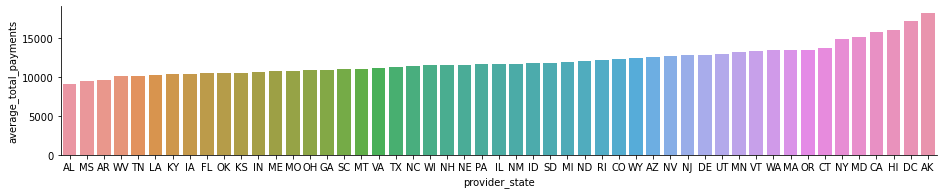

In [36]:
table1=payment_7years.sort_values('average_total_payments')
sns.catplot(kind='bar',x="provider_state",y='average_total_payments',data=table1,height=2.6, aspect=5)

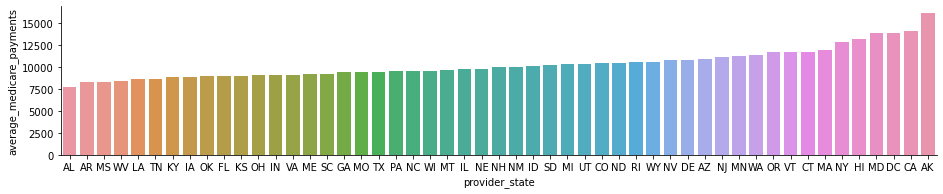

In [27]:
table2=payment_7years.sort_values('average_medicare_payments')
sns.catplot(kind='bar',x="provider_state",y='average_medicare_payments',data=table2 ,height=2.6, aspect=5)

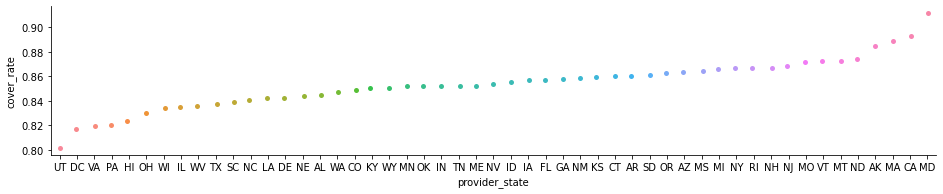

In [33]:
table3=payment_7years.sort_values('cover_rate')
sns.catplot(x="provider_state",y='cover_rate',data=table3 ,height=2.6, aspect=5)

The table shows the average total payment through out the US from 2011 to 2017. As we mention previously, we insert a 'year' column for each inpatient table. We union the inpatient payment tables altogether and list the average total payment for each year from 2011 to 2017. We are trying to see how does the US overall average total payments change throughout the times. As the list result shows, the average total payment increased each year from 2011 to 2017, especially that there was a significant increase during the year 2013 to 2014. The reason behind this was probably due to the Patient Protection and Affordable Care Act, and commonly known as Obamacare. The act came up in 2010 and implemented in 2014. 

In [7]:
pm_by_year = inpatient_payment_by_year[['year','average_total_payments']]
pm_by_year = pm_by_year.groupby('year').mean()
pm_by_year

,average_total_payments
year,
2011,9816.182595
2012,10073.755765
2013,10518.629270
2014,13261.383875
2015,13297.207508
2016,13801.743273
2017,14111.211998


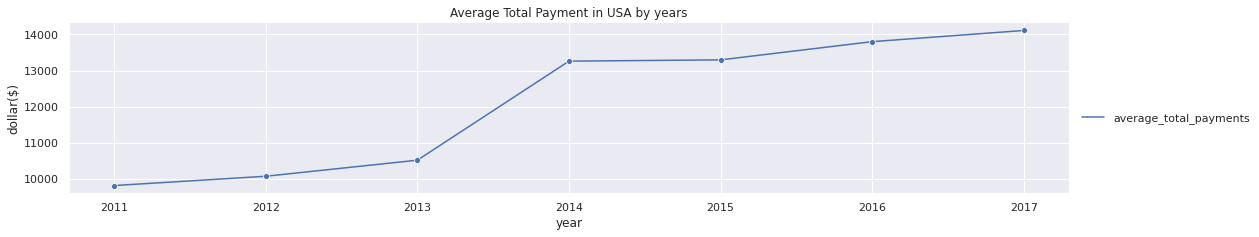

In [105]:
sns.relplot(kind='line', marker='o', data=pm_by_year,height=3, aspect=5)
plt.title('Average Total Payment in USA by years')
plt.ylabel('dollar($)')
sns.despine()

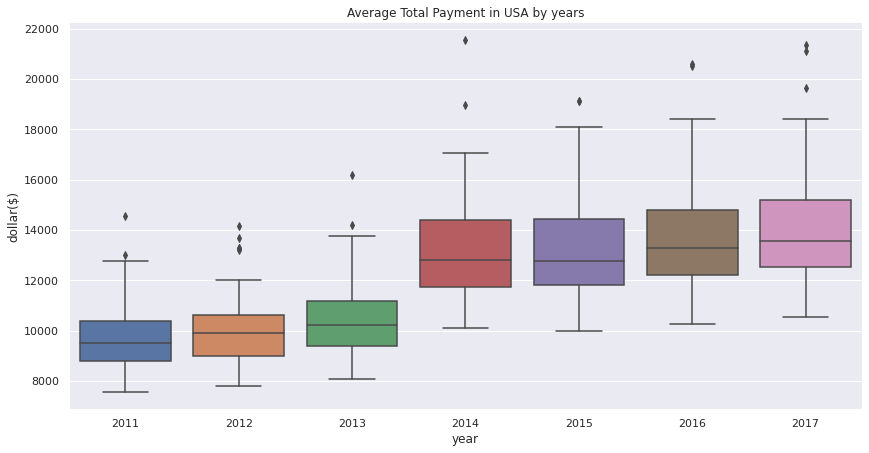

In [112]:
pm_by_year_state = inpatient_payment_by_year[['year','provider_state','average_total_payments']] 
sns.catplot(x="year", y="average_total_payments", data=pm_by_year_state, kind ='box',height=6, aspect=2)
plt.title('Average Total Payment in USA by years')
plt.ylabel('dollar($)')
sns.despine()

## 3. Exploratory Data Analysis

#### 3.1 What is the average total payment in each state in 2017?

As the table shows, the TOP 5 average total payment states are Alaska(AK), Washington D.C(DC), Hawaii(HI), California(CA), and Maryland(MD). And the state with lowest average total cost is Alabama(AL) with $10520 in year 2017.

In [13]:
pm_2015 = inpatient_2015[['provider_state','average_total_payments']]
pm_2015 = pm_2015.groupby('provider_state').mean().sort_values(by='average_total_payments',ascending = False).reset_index()
pm_2015.head(5)

,provider_state,average_total_payments
0,DC,19137.899176
1,AK,19125.670494
2,HI,18080.274527
3,CA,17170.263905
4,MD,16692.964310


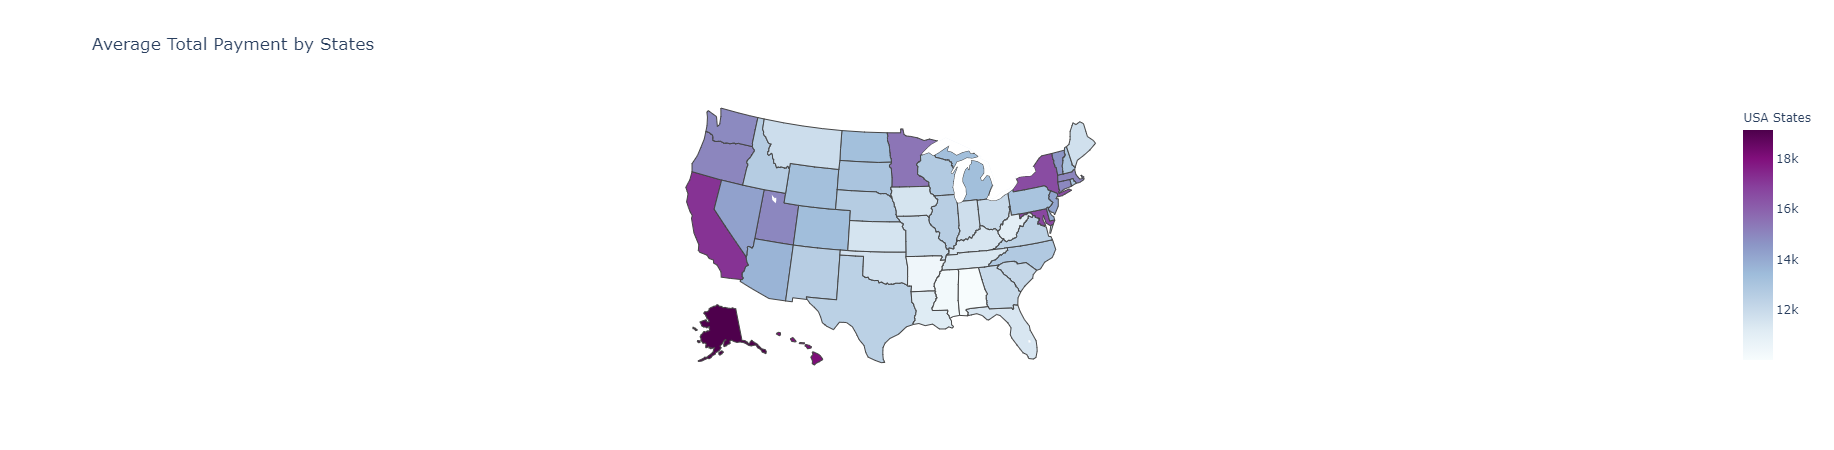

In [102]:
map_data = dict(type='choropleth',
            locations=pm_2015['provider_state'],
            locationmode='USA-states',
            colorscale='BuPu',
            text=pm_2015['provider_state'],
            z=pm_2015['average_total_payments'],
            colorbar=dict(title="USA States"),
           )
map_layout = dict(title = 'Average Total Payment by States', geo = {'scope':'usa'})
map_actual = go.Figure(data=[map_data], layout=map_layout)
iplot(map_actual)

#### 3.2 Does medicare payments adjust geographically?

After comparing the result in each state to the nationwide medicare payments, it is obvious that medicare payments adjust geographically.

Text(0.5, 1.0, 'Medicare payments in states compared to nationwide average in 2015')

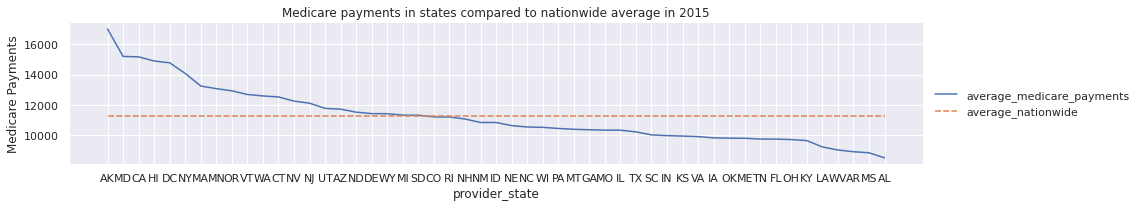

In [37]:
medicare_payments = inpatient_2015[['provider_state','average_medicare_payments']]
medicare_payments_states = (medicare_payments.groupby('provider_state').mean()).sort_values(by="average_medicare_payments",ascending = False)
avg_nation_m = medicare_payments_states['average_medicare_payments'].mean()
medicare_payments_states['average_nationwide'] = avg_nation_m
medicare_payments_states = medicare_payments_states.eval('Relative_to_nationwide = average_medicare_payments/average_nationwide').round({'Relative_to_nationwide':2})
df_medicare = medicare_payments_states.drop(['average_nationwide'],axis=1)
#df_medicare.info()
#df_medicare
df_plot = medicare_payments_states.drop(['Relative_to_nationwide'],axis=1)
sns.relplot(data=df_plot, kind = 'line',height=2.6, aspect=5)
plt.ylabel('Medicare Payments')
plt.title('Medicare payments in states compared to nationwide average in 2015')

#### 3.3 What is the inpatient coverage rate in each state?

We use medicare payments divided by total payments to get the coverage rate. We can see the coverage rate varies from state to state.

In [20]:
cover_rate = inpatient_2015[['provider_state','average_medicare_payments','average_total_payments']]
c = cover_rate.groupby('provider_state').sum().eval('cover_rate = average_medicare_payments/ average_total_payments').round({'cover_rate':3})

,average_medicare_payments,average_total_payments,cover_rate
provider_state,,,
AK,4.477386e+06,5.030051e+06,0.890
AL,3.672016e+07,4.310629e+07,0.852
AR,2.251498e+07,2.625726e+07,0.857
AZ,4.050999e+07,4.721704e+07,0.858
CA,2.295004e+08,2.594942e+08,0.884
CO,2.549723e+07,3.024909e+07,0.843
CT,3.155988e+07,3.759063e+07,0.840
DC,1.094569e+07,1.416205e+07,0.773
DE,8.087012e+06,9.805910e+06,0.825


In [23]:
df = c.reset_index()
df[['provider_state','cover_rate']]

,provider_state,cover_rate
0,AK,0.890
1,AL,0.852
2,AR,0.857
3,AZ,0.858
4,CA,0.884
5,CO,0.843
6,CT,0.840
7,DC,0.773
8,DE,0.825
9,FL,0.854


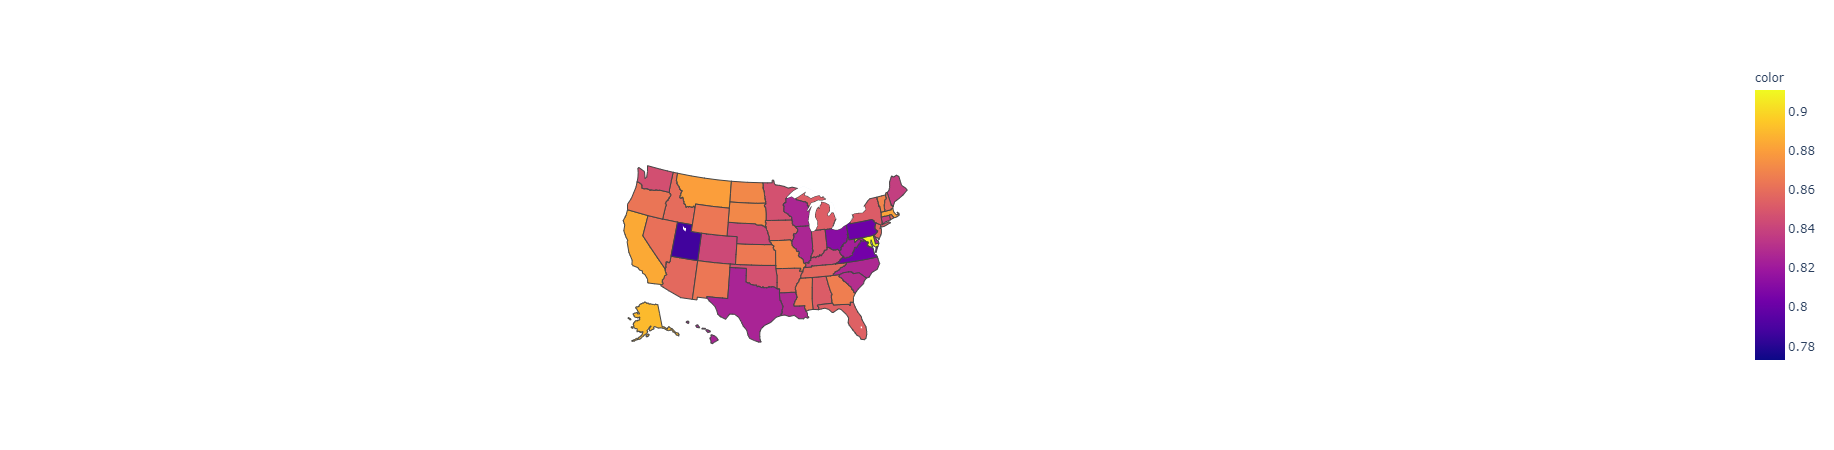

In [26]:
fig = px.choropleth(locations=df['provider_state'],locationmode='USA-states',color=df['cover_rate'],scope='usa')
fig.show()

map_data = dict(type='choropleth',
            locations=df['provider_state'],
            locationmode='USA-states',
            colorscale='BuPu',
            text=df['provider_state'],
            z=df['cover_rate'],
            colorbar=dict(title="USA States"),
           )
map_layout = dict(title = 'Average Total Payment by States', geo = {'scope':'usa'})
map_actual = go.Figure(data=[map_data], layout=map_layout)
iplot(map_actual)

#### 3.4 Why are the coverage rates for each state different?

We noticed that the coverage rates for each state in 2017 ranges from 0.76 (DC) to 0.91 (MD), so we would like to find the reason for the differences. We seek to clinical conditions (DRG_Definition in data), and list the clinical conditions with the highest covered charges for states with top 5 and bottom 5 coverage rates.

Top clinical conditions for top 5 states:

In [17]:
inpatient_top_states = inpatient_2015[inpatient_2015['provider_state'].isin(['MD', 'MT', 'MA', 'CA', 'MO'])]
inpatient_top_states_pivot = pd.pivot_table(inpatient_top_states, values='average_medicare_payments', index='drg_definition', columns='provider_state', aggfunc='sum')
inpatient_top_states_pivot = inpatient_top_states_pivot[['MD', 'MT', 'MA', 'CA', 'MO']]
inpatient_top_states_pivot = inpatient_top_states_pivot.sort_values('CA', ascending=False)
inpatient_top_states_pivot.head(10)

provider_state,MD,MT,MA,CA,MO
drg_definition,,,,,
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,1511656.67,221148.55,1472536.40,7849348.22,1222360.68
870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,1240522.87,85435.29,1218854.79,7263706.31,902730.04
"003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.",688861.08,NaN,1437187.57,4278506.33,1497185.02
"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.",906788.55,NaN,755311.81,4272473.93,746505.70
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,1268943.90,156649.95,1134736.26,4221416.82,915917.09
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,788067.75,96794.46,690964.36,4182979.98,712519.51
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,1111361.50,35662.92,812832.44,3798422.86,804145.17
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,910051.66,141865.56,809480.68,3733334.50,736175.22
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,981859.92,189197.62,852573.47,3104605.70,672974.02


Top clinical conditions for last 5 states:

In [ ]:
inpatient_last_states = inpatient_2015[inpatient_2015['provider_state'].isin(['DC', 'HI', 'PA', 'VA', 'DE'])]
inpatient_last_states_pivot = pd.pivot_table(inpatient_last_states, values='average_medicare_payments', index='drg_definition', columns='provider_state', aggfunc='sum')
inpatient_last_states_pivot = inpatient_top_states_pivot[['DC', 'HI', 'PA', 'VA', 'DE']]
inpatient_last_states_pivot = inpatient_top_states_pivot.sort_values('DC', ascending=False)
inpatient_last_states_pivot.head(10)

The clinical conditions with the most covered charges for each state are similar, including major joint replacement, septicemia, heart failure, etc. Therefore, we further examine the coverage rates for the common top clinical conditions for those 10 states, and find out that coverage rates for those clinical conditions are good indicators of overall coverage rates for each state. 

In [28]:
%%bigquery
SELECT provider_state, 
  DRG_definition AS clinical_conditions,
  ROUND(SUM(Average_Medicare_Payments)/SUM(average_total_payments),3) AS cover_rate
FROM `ba775-team-5a.temp.inpatient_2017`
WHERE provider_state IN ('MD', 'MT', 'MA', 'CA', 'MO', 'DE', 'VA', 'PA', 'HI', 'DC')
  AND DRG_definition in 
    (SELECT DRG_definition AS clinical_conditions
    FROM `ba775-team-5a.temp.inpatient_2017`
    group by DRG_definition
    ORDER BY SUM(average_total_payments) desc
    LIMIT 15)
GROUP BY provider_state, DRG_definition
ORDER BY provider_state, cover_rate DESC

,provider_state,clinical_conditions,cover_rate
0,CA,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,0.949
1,CA,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,0.937
2,CA,870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,0.935
3,CA,981 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PR...,0.932
4,CA,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,0.928
...,...,...,...
142,VA,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,0.809
143,VA,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,0.809
144,VA,330 - MAJOR SMALL & LARGE BOWEL PROCEDURES W CC,0.805
145,VA,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,0.768


#### 3.5 The relationship between Life expectancy/Income and Avg_Total_Payment

Text(0.5, 0.98, 'The Relationship between Life expectancy and Income and Average total payment')

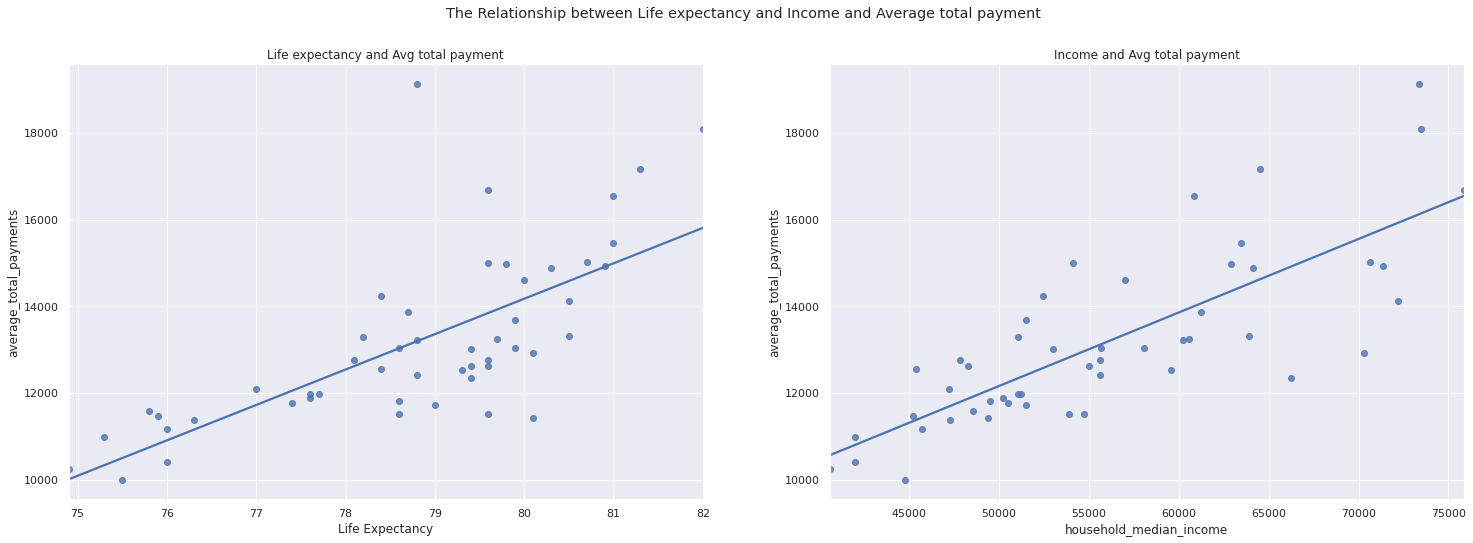

In [87]:
size = (25,8)
fig, ax = plt.subplots(1,2,figsize=size)

total_payment_by_state = inpatient_2015.copy()
total_payment_by_state_clean = total_payment_by_state.groupby('provider_state')['average_total_payments'].mean().to_frame().reset_index()
life_income_payment = life_expectancy.merge(total_payment_by_state_clean,left_on='State',right_on='provider_state', how='inner').drop('provider_state', axis=1)\
                                    .merge(income_state, left_on='State', right_on='abbreviation',how='inner').drop('abbreviation', axis=1)
a = sns.regplot(x='Life Expectancy',y='average_total_payments',data=life_income_payment,ax=ax[0],ci=None)
a.title.set_text('Life expectancy and Avg total payment')
b = sns.regplot(x='household_median_income',y='average_total_payments',data=life_income_payment,ax=ax[1],ci=None)
b.title.set_text('Income and Avg total payment')

plt.suptitle('The Relationship between Life expectancy and Income and Average total payment')

## 4. Conclusions

Conclusions:
1. Average total payment increased through 2011-2017.
2. The clinical condition is the major factor on cover rate.
3. Base on the regression charts between Life expectancy and Average total payment, we can conclude that there is a postive relationship between Life expectancy and Average total payment. 
           For example, if we have higher life expectancy, the Average total payment will be higher.
4. Base on the regression charts between Income_median and Average total payment, we can conclude that there is a postive relationship between Income_median and Average total payment. 
           For example, if we have higher Income, the Average total payment will be higher.

## 5. References

Reference：
- https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data
- https://data.census.gov/cedsci/table?q=S19&d=ACS%201-Year%20Estimates%20Subject%20Tables&tid=ACSST1Y2019.S1901
- https://www.cdc.gov/nchs/data-visualization/life-expectancy/ 